{'11': 521, '00': 479}


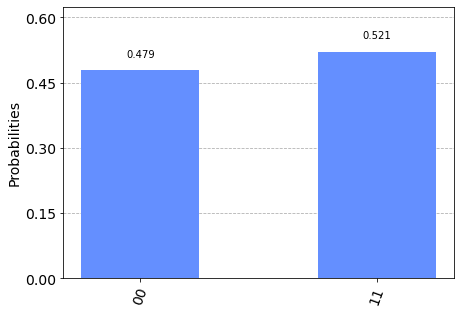

In [74]:
%matplotlib inline
#Amitava Chakraborty - 11th June 2018
#Plotting Data in Qiskit
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector

#Plot histogram
#To visualize the data from a quantum circuit run on a real device or qasm_simulator 
#we will use 
#plot_histogram(data)

#We make a 2 qubit Bell state
q = QuantumRegister(2)
c = ClassicalRegister(2)

# quantum circuit to make a Bell state 
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.z(q[1])
#Now we put a measurement gate
meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)
plot_histogram(counts)

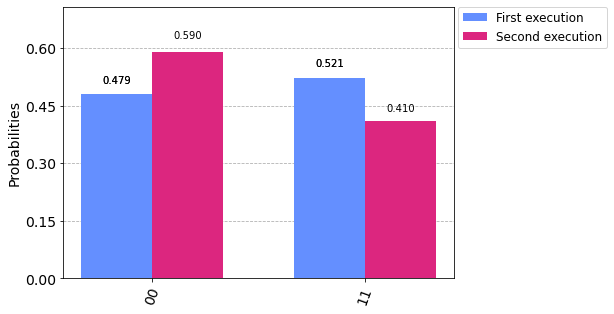

In [27]:
#Options when plotting a histogram to adjust the output graph
#legend kwarg - to provide a label for the executions
#takes a list of strings use to label each execution's results
#useful when plotting multiple execution results in the same histogram

#sort kwarg - to adjust the order the bars in the histogram are rendered
#can be set to asc or dsc

#number_to_keep kwarg - integer for the number of terms to show
#rest are grouped together in a single bar called rest

#color kwarg - adjust the color of the bars
#a string or a list of strings for the colors

#bar_labels kwarg - adjust whether labels are printed above the bars or not

#figsize kwarg - a tuple of the size in inches to make the output figure

# Execute 2 qubit Bell state again
second_result = execute(circ, backend, shots=100).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

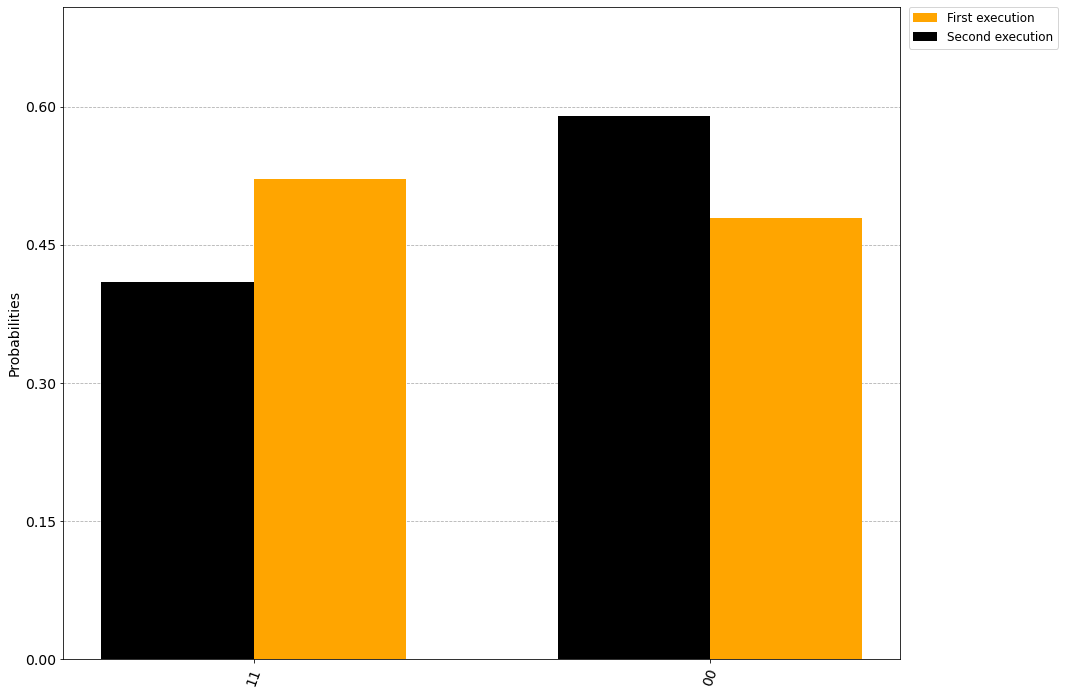

In [28]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12), 
               color=['orange', 'black'], bar_labels=False)

In [29]:
#Using the output from plot_histogram()
#When using the plot_histogram() function it returns a matplotlib.Figure 
#for the rendered visualization. 
#Jupyter notebooks understand this return type and renders it
#but when running outside of jupyter you do not have this feature automatically. 
#However, matplotlib.Figure class natively has methods to both display and save the visualization. 
#You can call .show() on the returned object from plot_histogram() to open the image in a new window 
#(assuming your configured matplotlib backend is interactive). 
#Or alternatively you can call .savefig(out.png) to save the figure to out.png. 
#The savefig() takes a path so you can just the location and filename where you're saving the output.

#Interactive histogram plots for Jupyter Notebooks.
#There is an alternate function for plotting histograms when running in a Jupyter notebook. 
#This function iplot_histogram() is made using an externally hosted JS library 
#for use in Jupyter notebooks. 
#The interactive plot can only be used if you're running inside a jupyter notebook and 
#only if you have external connectivity to the host with the JS library. 
#If you use iplot_histogram() outside of a jupyter notebook it will fail.
from qiskit.visualization import iplot_histogram
# Run in interactive mode
iplot_histogram(counts)
iplot_histogram([counts,second_counts])

[ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]


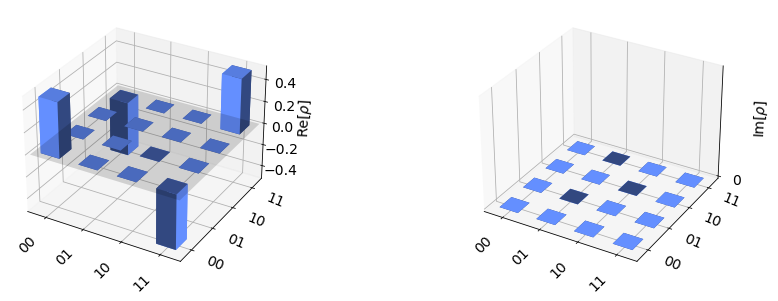

In [68]:
#Plot State
#In many situations you want to see the state of a quantum computer. 
#This could be for debugging. Here we assume you have this state 
#(either from simulation or state tomography) and 
#the goal is to visualize the quantum state. 
#This requires exponential resources, so we advise to only view the state of small quantum systems. 
#There are several functions for generating different types of visualization of a quantum state

#plot_state_city(quantum_state)
#plot_state_paulivec(quantum_state)
#plot_state_qsphere(quantum_state)
#plot_state_hinton(quantum_state)
#plot_bloch_multivector(quantum_state)

#A quantum state is either a state matrix $\rho$ (Hermitian matrix) or 
#statevector $|\psi\rangle$ (complex vector). 
#The state matrix is related to the statevector by
#$$\rho = |\psi\rangle\langle \psi|.$$
#And is more general as it can represent mixed states (positive sum of statevectors)
#$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$
#The visualizations generated by the functions are:
#'plot_state_city': The standard view for quantum states where 
#the real and imaginary (imag) parts of the state matrix are plotted like a city

#'plot_state_qsphere': The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

#'plot_state_paulivec': The representation of the state matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$

#'plot_state_hinton': Same as 'city' but with the size of the element represents the value of the matrix element.

#'plot_bloch_multivector': The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)
print(psi)

psi = [ 0.70710678,  0, 0, -0.70710678]
plot_state_city(psi)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

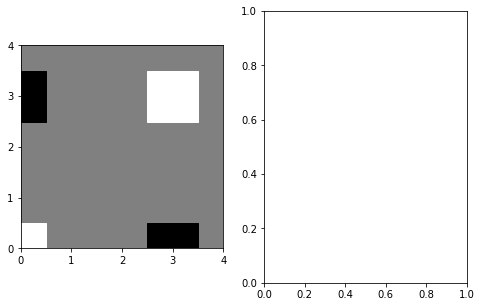

In [69]:
plot_state_hinton(psi)

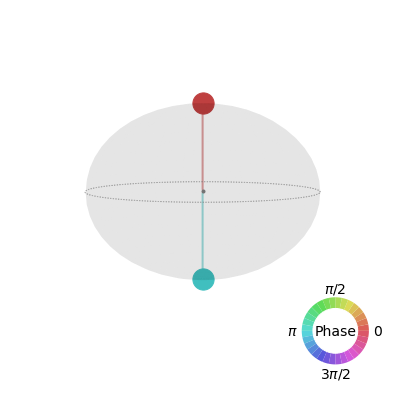

In [70]:
plot_state_qsphere(psi)

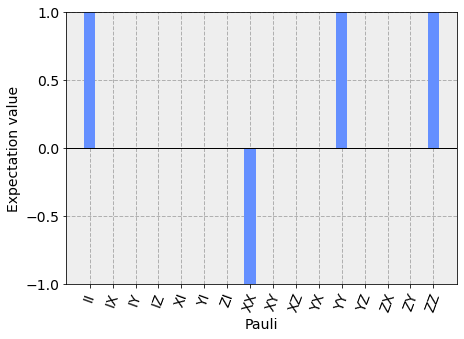

In [71]:
plot_state_paulivec(psi)

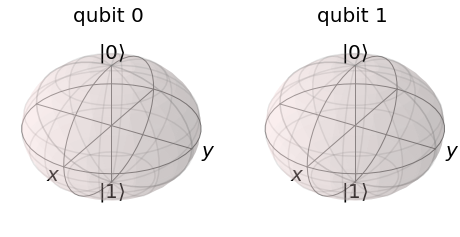

In [73]:
plot_bloch_multivector(psi)

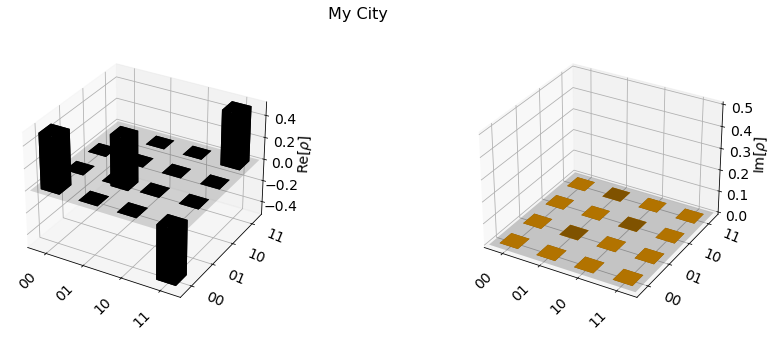

In [18]:
#Here we see that there is no information about the quantum state in the single qubit space 
#as all vectors are zero.

#Options when using state plotting functions
#The various functions for plotting quantum state 
#provide a number of options to adjust the how the plots are rendered. 
#plot_state_city() options
#title (str): a string that represents the plot title
#figsize (tuple): figure size in inches (width, height).
#color (list): a list of len=2 giving colors for real and imaginary components of matrix elements.
plot_state_city(psi, title="My City", color=['black', 'orange'])

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

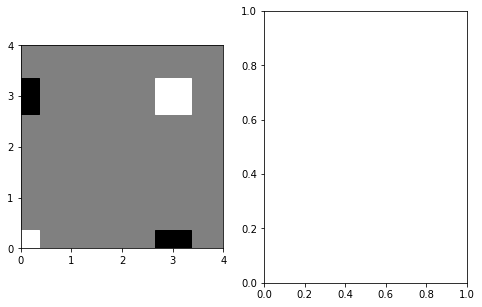

In [19]:
#plot_state_hinton() options
#title (str): a string that represents the plot title
#figsize (tuple): figure size in inches (width, height).
plot_state_hinton(psi, title="My Hinton")

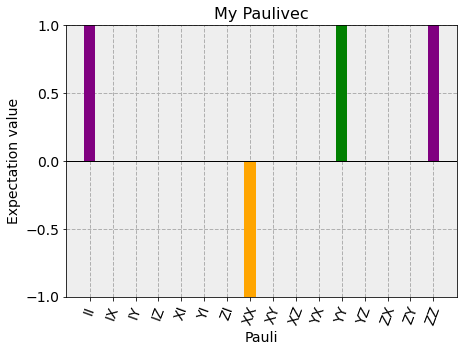

In [20]:
#plot_state_paulivec() options
#title (str): a string that represents the plot title
#figsize (tuple): figure size in inches (width, height).
#color (list or str): color of the expectation value bars.
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

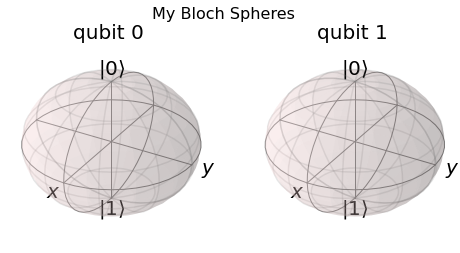

In [21]:
#plot_state_qsphere() options
#figsize (tuple): figure size in inches (width, height).

#plot_bloch_multivector() options
#title (str): a string that represents the plot title
#figsize (tuple): figure size in inches (width, height).
plot_bloch_multivector(psi, title="My Bloch Spheres")

In [22]:
#Using the output from state plotting functions
#When using the any of the state plotting functions 
#it returns a matplotlib.Figure for the rendered visualization. 
#Jupyter notebooks understand this return type and renders it
#but when running outside of jupyter you do not have this feature automatically. 
#However, matplotlib.Figure class natively has methods to both display and save the visualization. 
#You can call .show() on the returned object to open the image in a new window 
#(assuming your configured matplotlib backend is interactive). 
#Or alternatively you can call .savefig(out.png) to save the figure to out.png 
#in the current working directory. 
#The savefig() takes a path so you can just the location and filename where you're saving the output.

#Interactive State Plots for Jupyter Notebooks
#Just like with plot_histogram() 
#there is a second set of functions for each of the functions to plot the quantum state. 
#These functions have the same name but with a prepended i:
#iplot_state_city(quantum_state)
#iplot_state_paulivec(quantum_state)
#iplot_state_qsphere(quantum_state)
#iplot_state_hinton(quantum_state)
#iplot_bloch_multivector(quantum_state)
#these functions are made using an externally hosted JS library for use in Jupyter notebooks. 
#The interactive plot can only be used if you're running inside a jupyter notebook and 
#only if you have external connectivity to the host with the JS library. 
#If you use these functions outside of a jupyter notebook it will fail.
from qiskit.tools.visualization import iplot_state_paulivec
# Generate an interactive pauli vector plot
iplot_state_paulivec(psi)

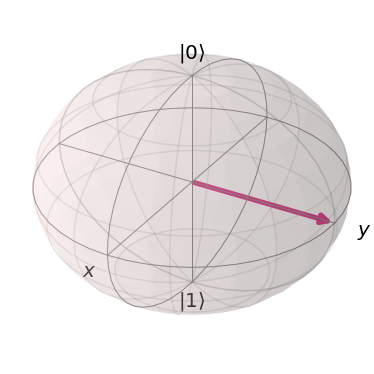

In [23]:
#Plot Bloch Vector
#A standard way of plotting a quantum system is using the Bloch vector. 
#This only works for a single qubit and takes as inputs the Bloch vector.
#The Bloch vector is defined as 
#$[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, 
#where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and 
#$\rho$ is the state matrix.
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,1,0])

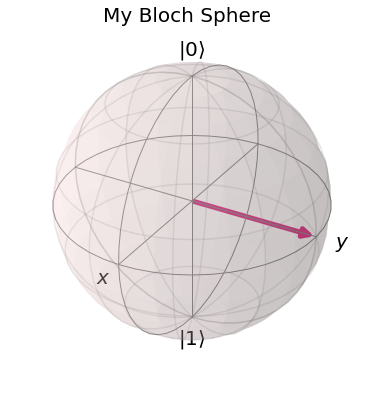

In [17]:
#Options for plot_bloch_vector()
#title (str): a string that represents the plot title
#figsize (tuple): Figure size in inches (width, height).
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

#Adjusting the output from plot_bloch_vector()
#When using the plot_bloch_vector function it returns a matplotlib.Figure 
#for the rendered visualization. 
#Jupyter notebooks understand this return type and renders it
#but when running outside of jupyter you do not have this feature automatically. 
#However, matplotlib.Figure class natively has methods to both display and save the visualization. 
#You can call .show() on the returned object to open the image in a new window 
#(assuming your configured matplotlib backend is interactive). 
#Or alternatively you can call .savefig(out.png) to save the figure to out.png 
#in the current working directory. 
#The savefig() takes a path so you can just the location and filename 
#where you're saving the output.

In [23]:
# Quantum Phase Demonstration using bloch
import numpy as np
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()

meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)

meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.s(q).inverse()
meas_y.h(q)
meas_y.measure(q, c)

meas_z = QuantumCircuit(q, c)
meas_z.barrier()
meas_z.measure(q, c)

bloch_vector = ['x', 'y', 'z']
exp_vector = range(0, 21)
circuits = []
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = 2*np.pi*exp_index/(len(exp_vector)-1)
    middle.u1(phase, q)
    circuits.append(pre + middle + meas_x)
    circuits.append(pre + middle + meas_y)
    circuits.append(pre + middle + meas_z)

In [24]:
from qiskit.tools.visualization import circuit_drawer
for circuit in circuits:
    circuit_drawer(circuit, output='mpl', plot_barriers=False)

In [25]:
# Execute the circuit
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [22]:
# Plot the result
for exp_index in exp_vector:
    bloch = [0, 0, 0]
    for bloch_index in range(len(bloch_vector)):
        data = result.get_counts(circuits[3*exp_index+bloch_index])
        try:
            p0 = data['0']/1024.0
        except KeyError:
            p0 = 0
        try:
            p1 = data['1']/1024.0
        except KeyError:
            p1 = 0
        bloch[bloch_index] = p0-p1
    plot_bloch_vector(bloch)

The qiskit.result.Result() method get_counts() returns a list of all the counts available when there are multiple circuits in a job. This works when get_counts() is called with no arguments.

With this one can draw all the results from multiple circuits in the same histogram.

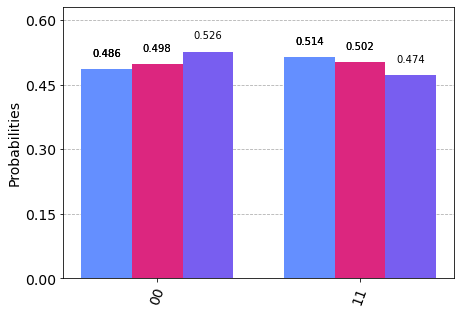

In [4]:
sim = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
result = execute([qc, qc, qc], sim).result()

plot_histogram(result.get_counts())

# Interactive Plots

In [10]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import iplot_histogram
%matplotlib inline

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('qasm_simulator')
job = execute([qc,qc,qc,qc,qc,qc], backend)
iplot_histogram(job.result().get_counts(),number_to_keep=4,figsize=(25,25), legend=['A','B','C','D','E','F'])